<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Data_Sprint_45_Sign_Language_Hand_Gesture_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

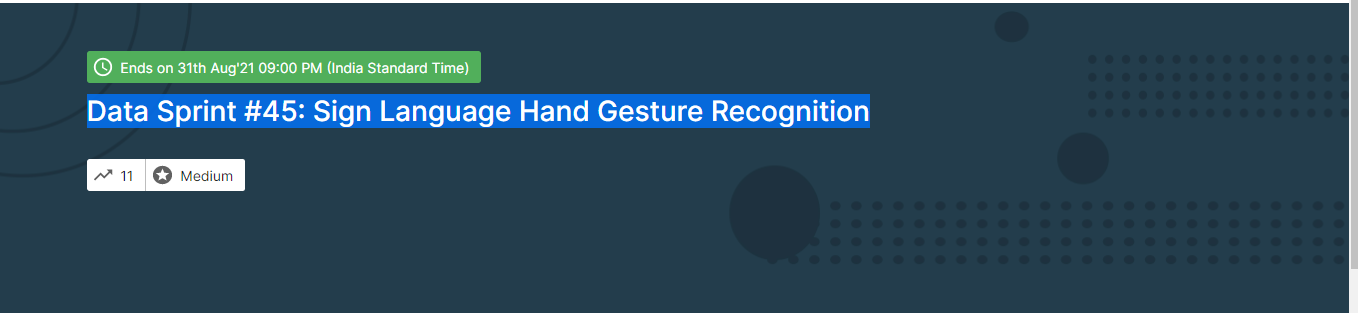

## Problem Overview
New technologies are emerging that can assist those with hearing disabilities, but there is still plenty of work to be done. Computer vision applications, for example, could improve communication with the deaf and hard-of-hearing even more due to advancements in machine learning algorithms.

 
## Problem Statement
You are required to build a machine learning model that is capable of identifying American Sign Language (ASL) hand gestures. 

## Evaluation

Submissions are evaluated using Accuracy Score.

## Data Description

train - contains all the images that are to be used for training your model.

Training_set.csv - this csv file has contains the labels for the training images

test - contains 26000+ images. For these images you are required to make predictions

Testing_set.csv - this is the order of the predictions for each image that is to be submitted on the platform. Make sure the predictions you submit are with their image’s filename in the same order as given in this file.

sample_submission.csv- this is the sample submission file for the data sprint

 

## Getting Started Code For Data Sprint #45 on DPhi

## Download Images

In [1]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1QtuAY57-FVeMiDHExgYN4-kEgGElQYH-',
dest_path='content/asl_alphabets.zip',
unzip=True)

Unzipping...Done.


In [2]:
%%capture
!pip install ipyplot

## Loading Libraries

In [4]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf # Deep Learning Tool
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set
from sklearn.metrics import f1_score, accuracy_score
import cv2
import ipyplot
from PIL  import Image
import seaborn as sns
import matplotlib.pyplot as plt



        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `base_64` param to `True`.
        


In [6]:
train = pd.read_csv("/content/content/asl_alphabets/Training_set.csv")
test = pd.read_csv("/content/content/asl_alphabets/Testing_set.csv")
sub = pd.read_csv("/content/content/asl_alphabets/sample submission.csv")

In [7]:
train.head()

,filename,label
0,Image_1.jpg,B
1,Image_2.jpg,P
2,Image_3.jpg,J
3,Image_4.jpg,T
4,Image_5.jpg,B


In [8]:
train_formated = train.copy()
train_formated['filename'] = "/content/content/asl_alphabets/train/" + train['filename']
train_formated.head()

,filename,label
0,/content/content/asl_alphabets/train/Image_1.jpg,B
1,/content/content/asl_alphabets/train/Image_2.jpg,P
2,/content/content/asl_alphabets/train/Image_3.jpg,J
3,/content/content/asl_alphabets/train/Image_4.jpg,T
4,/content/content/asl_alphabets/train/Image_5.jpg,B


## Prepare Image and Label Lists

In [9]:
image_samples = train_formated['filename'].values.tolist()
image_labels = train_formated['label'].values.tolist()

## Visaulize training images randomly

* pro tip : https://www.linkedin.com/feed/update/urn:li:activity:6830366694209273856/


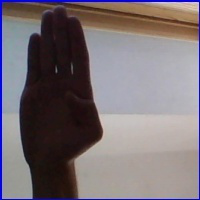
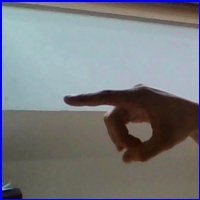
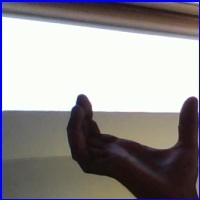
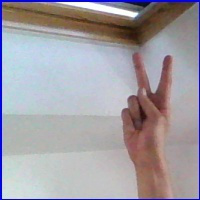
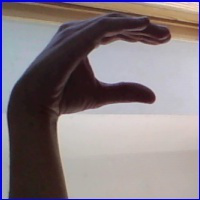
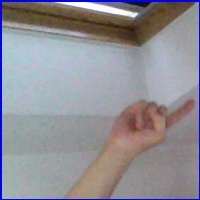
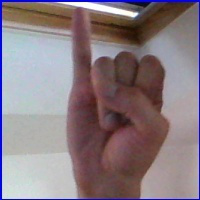
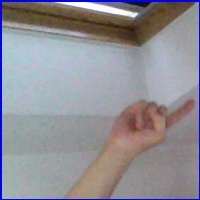
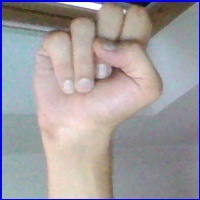
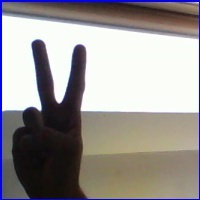
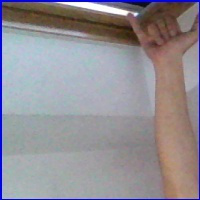
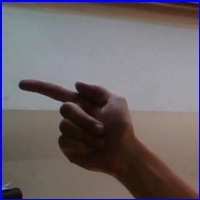
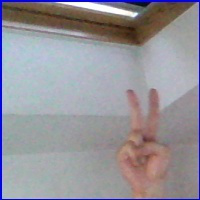
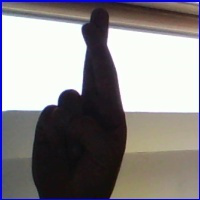
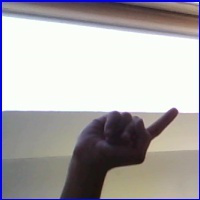
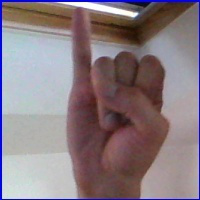


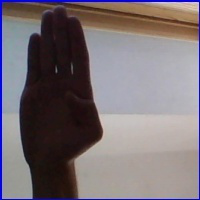
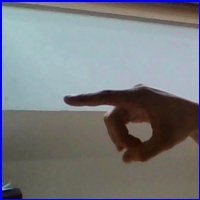
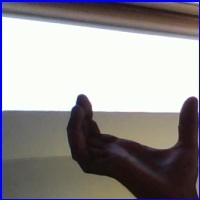
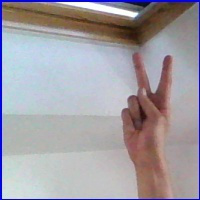
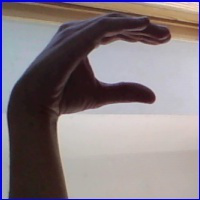
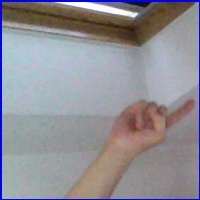
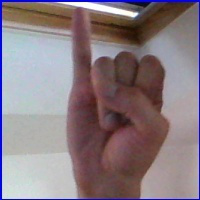
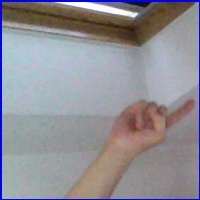
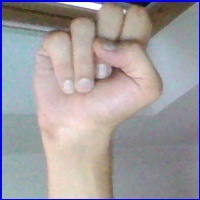
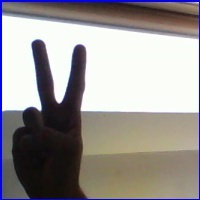
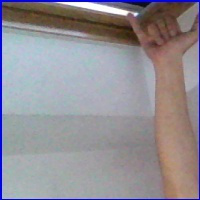
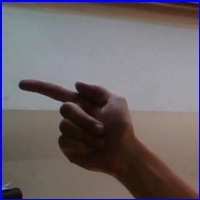
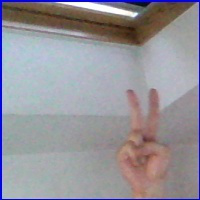
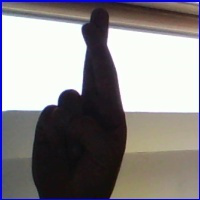
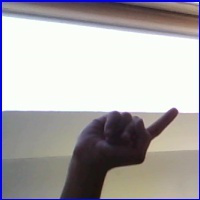
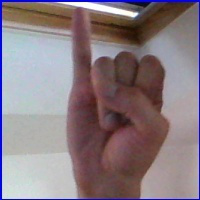

In [12]:
import random
image_array = []
image_label_array = []
for i in range(16):
  index = random.randint(1,100)
  img = Image.open(image_samples[index])
  image_array.append(img)
  image_label_array.append(image_labels[index])
ipyplot.plot_images(image_array,image_label_array,img_width=200)

## Distribution of labels

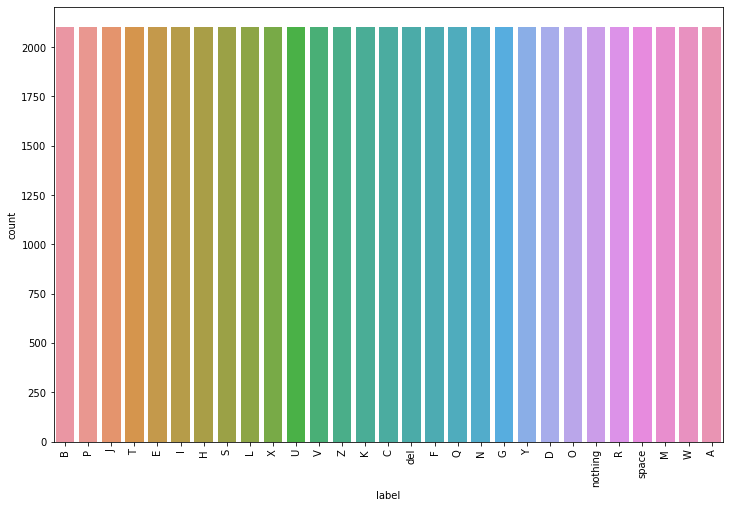

In [14]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.countplot(x='label',data=train)

* Balanced dataset

## Actual image size

In [15]:
img = cv2.imread(image_samples[0])
img.shape

(200, 200, 3)